# Gradient Descent - Machine Problem 4
Type down all necessary packages and modules in the cell below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import random
import scipy.optimize as optimize

## TASK 1. Setting up the function to sue in looking for the minimum value
In this machine problem, the equation that we are going to work with is given by<br><br>
$z =  3(1-x)^2 exp[-[x^2 + (y+1)^2]] - 10(\frac{x}{5} - x^3 - y^5)exp[-(x^2+y^2)] - \frac{1}{3}exp[-[(x+1)^2 + y^2]]$
<br><br>in the domain $-3 \le x \le 3$ and $-3 \le y \le 3$. This is a complicated function, and it will be a pain to evaluate analytically. Thus, we are going to use symbolic Python. I've already written the code to convert the function to a symbolic equation. 

In [2]:
x, y, z = sym.symbols('x, y, z')
z = 3*((1-x)**2)*sym.exp(-(x**2) - (y+1)**2) - 10*(x/5 - x**3 - y**5)*sym.exp(-x**2-y**2) - 1/3*sym.exp(-(x+1)**2 - y**2)


To test out this symbolic function, solve for its value by running the command line in the cell below. Test it out yourself and change the values for $x$ and $y$ in the field below. 

In [3]:
z.evalf(subs={x: -2,y: 2})

0.0796679277691729

Create the vectors $x0$ and $y0$, with $n$ data points per vector. Use at least $n=100$.

In [4]:
n = 100
x0 = np.linspace(-3,3,n)
y0 = np.linspace(-3,3,n)

Using the command $meshgrid()$ under the $numpy$ module, generate a 2D map of the vectors $x0$ and $y0$ that will contain $nxn$ data points. Assign the variables $xx$ and $yy$ as the new coordinates. 

In [5]:
xx, yy = np.meshgrid(x0,y0)

Evaluate $z$ with the mesh $xx$ and $yy$. Assign the output of $z$ to the variable $zz$. If you can't make it work using the $evalf()$ function using the output from $meshgrid()$, use brute force and use a $for$ loop. Be very careful of how you place the indices.

In [6]:
zz = np.zeros((np.size(x0),np.size(y0)))
#zz = z.evalf(subs = {x : xx, y : yy})
for i in range(np.size(x0)):
    for j in range(np.size(y0)):
        zz[j,i] = z.evalf(subs={x: x0[i],y: y0[j]})

Accurately plot the result in contour plot. Use a contour level that would allow you to see denser lines and therefore see the contours better. Add axes labels just to see which directions are $x$ and $y$. Also add a colorbar, that will allow you to determine the height levels better.

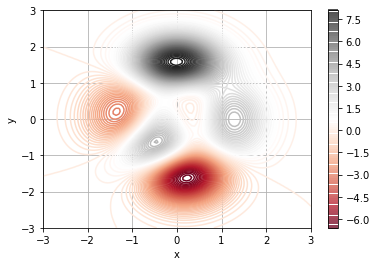

In [7]:
plt.contour(xx, yy, zz, 100, cmap='RdGy')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

We've now set up the function that we are going to use to look for its minimum value. From the graph, estimate the location of the minimum value of the plot. Write down your answer in the field below.

In [8]:
# minimum x:
# minimum y:

## TASK 2. Implementation of the Gradient Descent Method
In this task, you are going to put all commands in one cell. It will be clearer why once you get going with the codes. Follow each step to the letter, so that you don't miss a point and make a mistake.

### 1. Make an initial guess
As in the previous methods, you need to select a point on the graph as your initial guess. Type down your initial guess in the field below. Use the variables $xinit$ and $yinit$ as the initial guesses for the location of the minimum value of the function $z$. (Don't make it too close to your estimated value in Task 1, so that you can clearly see how Gradient Descent works.)<br>
So that you know where your guess is and where your succeeding guesses will be, plot the function $z$ in a contour plot and add your initial guess to the plot.<br>
### 2. Set up the differential equation
Here's the part where you will see the advantage of using symbolic math. Take another look at the equation and try to estimate how long it will take you to analytically solve for $\frac{\partial z}{\partial x}$ and $\frac{\partial z}{\partial y}$. Instead, we're going to do Python do the work.<br> 
Use the $diff()$ function to differentate $z$ with respect to both $x$ and $y$. Assign the result to the variables $dzdx$ and $dzdy$, respectively.<br>
### 3. Solve for the gradient vector
This is written as<br>
$\vec{\nabla}z=\frac{\partial z}{\partial x} \hat{i}+\frac{\partial z}{\partial y} \hat{j}$
<br>at your initial guesses. More specifically, compute for $\frac{\partial z}{\partial x}$ and $\frac{\partial z}{\partial y}$ at $(xinit,yinit)$. You will need to use the $evalf()$ function to convert the result from symbolic to numerical digits. Assign the numerical outputs to the variables $gradx$ and $grady$, respectively.<br>
### 4. Define the new location
The new location would then depend on these gradient vector components. Along the x- and y-axes, these are written as<br>
$x_{new}=x{init}-\frac{\partial z}{\partial x} h$ and $y_{new}=y{init}-\frac{\partial z}{\partial y} h$,
 <br>respectively, if you want to look for the minimum values. Use the same step size as your variables $x0$ and $y0$ above. Implement these equations and assign the new x- and y-values to the variables $xnew$ and $ynew$.<br>
### 5. Repeat until the minimum value is found
Reassign the $xnew$ and $ynew$ variables to the initial variables $xinit$ and $yinit$, respectively, and repeat the process to find a new set of $xnew$ and $ynew$ coordinates. This means that you have to create a for loop. Create a $for$ loop of about 100 iterations to generate values of these new coordinates.<br>
Remember to include only the essential lines of code in the for loop to make it as efficient as possible. Also, save each value of the gradient variables and new coordinates per iteration. This means that you also need to preallocate for these variables before the for loop to make your code efficient.<br>
One more thing. Plot these new values per iteration so that you see if gets close to the minimum value.<br>
### 6. Choosing appropriate initial values
Notice that there ar at least 3 local minima. Among these these three, there is one that has the least $z$ value, and that's somewhere between 0 and 1 along the $x$ and between -2 and -1 along the $y$-axis. This is the global minimum. If you're lucky, then that means that you chose initial values that are near the global minimum value. Try out the following initial values and take a screen shot of the results (or save the figure as a *.png file) and attach them as part of your submission. Be sure to identify each image with their respective coordinates. This short exercise will allow you to see how important choosing the appropriate initial values are: (0,2), (-0.5,0.5), and (-1,-2).<br>
If you did this correctly, you will see that with the first one, it will lead you away from any of the minima. With the second one, it leads you to a local minimum, but not the global minimum. With the third, it will lead you to the global minimum within the domain of the plot.<br>
### 7. Setting a tolerance value
In step 5, we set about 100 iterations. To really make your code more efficient, a tolerance value must be set. A good tolerance value is 0.01 or 1% error. But which among the variables should you compare with this tolerance value? 
Set the variable  equal to 0.01. You need to carefully think about how to incorporate this in the loop. Select the correct variable to compare the tolerance value with such that when that variable goes below the tolerance value, the loop ends.<br>
In the matrix table below, in the second and third column, write down the coordinates of the global minimum. Write 'x' if it did not reach the global minimum. In the fourth column, write down how many iterations were necessary to get to the global minimum next to (or to the right of) their respective different initial values.
\begin{matrix}
 & x_{opt} & y_{opt} & iter\\
(-1,-2) &  &  & \\
(1,-1) &  &  & \\
(-0.5,-0.5) &  &  & \\
(-0.5,-0.67) &  &  & 
\end{matrix}<br>
### 8. Step size optimization
To further make your code more efficient, an optimum value of the step size, $h$, must be chosen for each iteration. The optimum value of $h$ is mathematically obtained from the equation<br>
$\frac{\partial f(x_{init}-\frac{\partial f}{\partial x}h,y_{init}-\frac{\partial f}{\partial y}h)}{\partial h}=0$.
<br>Numerically, you can choose a simpler optimization method. Choose from the Random Search Method, Quadratic Interpolation Method, or the Golden Section Method, and use this to solve for the optimum value of $h$. Then use this optimum value to solve for the new x- and y-coordinates.<br>
In the matrix table below, in the second and third column, write down the coordinates of the global minimum. Write 'x' if it did not reach the global minimum. In the fourth column, write down how many iterations were necessary to get to the global minimum next to (or to the right of) their respective different initial values.<br>
\begin{matrix}
 & x_{opt} & y_{opt} & iter\\
(-1,-2) &  &  & \\
(1,-1) &  &  & \\
(-0.5,-0.5) &  &  & \\
(-0.5,-0.67) &  &  & 
\end{matrix}

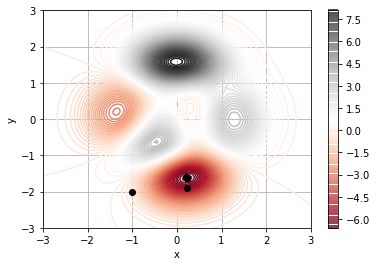

In [9]:
# 8
def randomztest(x0,y0,gradx,grady):
    iter = 100
    ytest = 0
    for j in range(iter):
        h = random.random()
        ycheck = z.evalf(subs={x : x0-gradx*h,y : y0-grady*h})
        if ycheck < ytest:
            ytest = ycheck
            # print('ytest = ' + str(ytest) + ' and j = ' + str(j))
            hopt = h
    return hopt

# 1
xinit = -1
yinit = -2
plt.contour(xx, yy, zz, 100, cmap='RdGy')
plt.plot(xinit,yinit,'ko', linewidth=5)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

# 2
dzdx = sym.diff(z,x,1)
dzdy = sym.diff(z,y,1)

# 5
n = 120
gradx = np.zeros(n)
grady = np.zeros(n)
xnew = np.zeros(n)
ynew = np.zeros(n)
h = np.zeros(n)

# 4
#h = x0[1] - x0[0]

# 8
h[0] = x0[1] - x0[0]

# 7
tol = 0.01
i = 1
temp = 100
while(abs(temp)>tol):    
    # 3
    gradx[i] = dzdx.evalf(subs={x : xinit,y : yinit})
    grady[i] = dzdy.evalf(subs={x : xinit,y : yinit})
    temp = gradx[i]
    
    # 8
    h[i] = randomztest(xinit,yinit,gradx[i],grady[i])

    # 4
    xnew[i] = xinit - gradx[i]*h[i]
    ynew[i] = yinit - grady[i]*h[i]

    # 5
    xinit = xnew[i]
    yinit = ynew[i]
    plt.plot(xinit,yinit,'ko', linewidth=5)
    
    # 7
    i += 1

### 9. Conclusions
State your conclusions as Markdown based on (1) the significance of setting an initial value, and (2) the importance of optimizing the step size. Type your answer

here

In the field below, display the values of the x- and y-coordinates of and the optimum value  at the global minimum.

In [10]:
print(i)
print(round(xinit,4))
print(round(yinit,4))

7
0.2282
-1.6255


### 10. Solution using Python's built-in function
Run this section to see the answer using Python's  function.